In [1]:
import os
import cv2 as cv
import dlib
import numpy as np
import matplotlib.pyplot as plt
from skimage.feature import hog

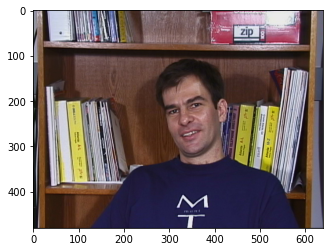

In [7]:
face_path = "C:/Users/Macondo/Desktop/NUS visual computing/Project 2_ Masked-Unmasked Face R/Dataset_1/Dataset_1/s01/03.jpg"
predictor_path = "D:\\Data\\shape_predictor_68_face_landmarks.dat"
predictor = dlib.shape_predictor(predictor_path)
img = dlib.load_rgb_image(face_path)
plt.imshow(img)

In [8]:
detector = dlib.get_frontal_face_detector()
dets = detector(img, 2)
det = dets[0]
img = dlib.as_grayscale(img)
shape = predictor(img, det)

In [9]:
# win = dlib.image_window()
# win.clear_overlay()
# win.set_image(img)
# win.add_overlay(shape)
# win.add_overlay(det)
# win.wait_until_closed()

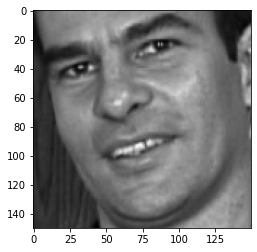

In [10]:
# try to localize face by key points
temp_points = shape.parts()
points = np.ndarray(shape=(0, 2), dtype=np.uint8)
for p in temp_points:
    points = np.vstack([points, [p.x, p.y]])
x_axis, y_axis = points[:, 0], points[:, 1]
left, right = np.min(x_axis), np.max(x_axis)
top, bottom = np.min(y_axis), np.max(y_axis)
crp_img = img[top-5:bottom+5, left-5:right+5]
crp_img = dlib.resize_image(crp_img, 150, 150)
plt.imshow(crp_img,cmap='gray')

In [11]:
# try to localize face by face detection
# crp_img = img[det.top():det.bottom(), det.left():det.right()]
# crp_img = dlib.resize_image(crp_img, 150, 150)
# plt.imshow(crp_img)
# plt.show()

In [12]:
shp_det = dlib.rectangle(0, 0, 150, 150)

In [13]:
local_shape = predictor(crp_img, shp_det)
key_points = local_shape.parts()
temp_points = key_points[2:15]
temp_points.extend([key_points[31], key_points[35], key_points[27]])

mask_points = np.ndarray(shape=(0, 2), dtype=np.uint8)
for p in temp_points:
    mask_points = np.vstack([mask_points, [p.x, p.y]])


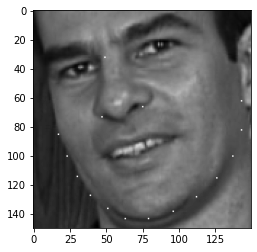

In [14]:
trial_img = np.copy(crp_img)
for p in mask_points:
    trial_img[p[1]-1, p[0]-1] = 255
plt.imshow(trial_img,cmap='gray')

In [15]:
cv.fillPoly(crp_img, [mask_points[:-1]], color=255)
cv.fillPoly(crp_img, [mask_points[-3:]], color=255)
# win = dlib.image_window()
# win.clear_overlay()
# win.set_image(crp_img)
# win.wait_until_closed()

array([[ 37,  57,  69, ...,  31,  30,  31],
       [ 37,  54,  67, ...,  30,  30,  28],
       [ 35,  50,  64, ...,  28,  28,  28],
       ...,
       [ 45,  46,  50, ..., 123, 117, 104],
       [ 47,  44,  48, ..., 125, 117, 102],
       [ 46,  43,  48, ..., 124, 115, 104]], dtype=uint8)

In [16]:
img_hog = hog(crp_img, orientations=8, pixels_per_cell=(10, 10),
                        cells_per_block=(1, 1), visualize=False, multichannel=False)

C:\Users\Macondo\AppData\Local\Temp\ipykernel_14808\2706613677.py:1: FutureWarning: `multichannel` is a deprecated argument name for `hog`. It will be removed in version 1.0. Please use `channel_axis` instead.
  img_hog = hog(crp_img, orientations=8, pixels_per_cell=(10, 10),


In [17]:
print(img_hog.size)

1800


In [18]:
import os
nomask_data_path = "D:\\Code_uc\\face_reco\\dataset_nomask"
print(os.path.join(nomask_data_path, "p1.jpg"))

D:\Code_uc\face_reco\dataset_nomask\p1.jpg
